In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import os
import tensorflow as tf

In [49]:
probabilities = np.array([[0.9, 0.3],[0.4, 0.6],[0.8, 0.2], [0.1, 0.9]])
actual = [[1, 0],[0, 1],[1, 0]]
#returns true if the positive class is greater than the threshold value
np.argmax(actual, axis=1)

array([0, 1, 0])

In [50]:
np.multiply((probabilities >= 0.3)[:, 1], 1)

array([1, 1, 0, 1])

In [52]:
np.arange(0.1, 1, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [2]:
header = ['label','rndm','weight']
# boosted frame
header += ['W_B_pt','W_B_eta','W_B_phi','W_B_E','W_B_m']
header += ['b_B_pt','b_B_eta','b_B_phi','b_B_E','b_B_m']
header += ['Wjj_B_dR','tWb_B_dR'] #dR = sqrt(phi^2 + eta^2)
header += ['Wjj_B_deta','Wjj_B_dphi','tWb_B_deta','tWb_B_dphi']
# lab frame
header += ['W_pt','W_eta','W_phi','W_E','W_m']
header += ['b_pt','b_eta','b_phi','b_E','b_m']
header += ['Wjj_dR','tWb_dR']
header += ['Wjj_deta','Wjj_dphi','tWb_deta','tWb_dphi']
header += ['t_pt','t_eta','t_phi','t_E','t_m']

header += ['btag1', 'btag2', 'btag3']

In [6]:
df = pd.read_csv('~/projects/samples/norm_results.csv', delimiter=',')

In [ ]:
df2 = pd.read_csv('~/projects/top-reco-tests/samples/norm_results_0.2.csv', delimiter=',')

In [11]:
final_df = df

## 

In [7]:
df = df.drop("weight", axis=1)

In [13]:
y = final_df['label']
X_norm = final_df.drop('label', axis=1).drop('Unnamed: 0', axis=1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=.15, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.15, shuffle=True)

In [25]:
X_train


,W_B_pt,W_B_eta,W_B_phi,W_B_E,W_B_m,b_B_pt,b_B_eta,b_B_phi,b_B_E,b_B_m,...,tWb_deta,tWb_dphi,t_pt,t_eta,t_phi,t_E,t_m,btag1,btag2,btag3
11052226,0.900451,0.492742,0.381660,0.245730,0.225565,0.900451,0.533572,0.048360,0.319463,0.343122,...,0.495177,0.947243,0.910836,0.436994,0.370068,0.335431,0.276111,0.60,0.60,0.00
6803260,0.900925,0.903623,0.360913,0.593949,0.058971,0.900925,0.415544,0.027613,0.908174,0.497611,...,0.903681,0.415743,0.907237,0.365542,0.286492,0.920589,0.904485,0.00,0.60,0.00
2969068,0.248913,0.905909,0.344465,0.271066,0.098904,0.248913,0.405690,0.011165,0.503246,0.267074,...,0.595918,0.389355,0.900105,0.491333,0.265186,0.232458,0.359274,0.00,0.00,0.60
4485378,0.523781,0.416556,0.214517,0.418862,0.178082,0.523781,0.901562,0.547826,0.902348,0.315016,...,0.374712,0.145151,0.403729,0.526634,0.324858,0.334116,0.547991,0.00,0.00,0.60
1931256,0.084496,0.399418,0.279404,0.166376,0.183695,0.084496,0.905612,0.919086,0.154698,0.216970,...,0.507337,0.406635,0.142733,0.903406,0.009601,0.236599,0.163555,0.00,0.00,0.00
4389669,0.189541,0.415899,0.215137,0.241478,0.245424,0.189541,0.901717,0.548445,0.267372,0.152127,...,0.402782,0.295212,0.352017,0.538560,0.236208,0.184631,0.254504,0.00,0.00,0.00
11568708,0.152059,0.582817,0.590174,0.292495,0.352254,0.152059,0.447572,0.256878,0.137951,0.288722,...,0.526486,0.278335,0.464796,0.458891,0.172319,0.158159,0.242136,0.00,0.00,0.00
641234,0.322552,0.518799,0.544485,0.150235,0.163122,0.322552,0.508694,0.211188,0.149208,0.196316,...,0.527083,0.455955,0.529323,0.374078,0.473064,0.521476,0.150749,0.00,0.00,0.00
5283781,0.383394,0.543481,0.097533,0.217406,0.234187,0.383394,0.485129,0.430840,0.215341,0.900376,...,0.913963,0.047320,0.280396,0.494247,0.428846,0.120531,0.219622,0.45,0.60,0.00
7402869,0.115773,0.904962,0.572194,0.136536,0.108750,0.115773,0.409774,0.238897,0.210323,0.231743,...,0.904957,0.494381,0.110262,0.398384,0.341557,0.091649,0.163561,0.00,0.00,0.00


In [24]:
y_train

11052226    0
6803260     0
2969068     0
4485378     0
1931256     0
4389669     0
11568708    0
641234      0
5283781     0
7402869     0
3766439     0
10313579    0
10478949    0
14471153    0
5686429     0
13897731    0
12121011    0
8081327     0
9503501     0
10664000    0
5090439     0
2073712     0
13144259    0
14393690    0
7017570     0
68796       0
9515105     0
5721119     0
3150034     0
3014715     0
           ..
8338687     0
13342257    0
14568073    0
9399498     0
5214134     0
3088506     0
7597449     0
821726      0
11964352    0
14296227    0
1599693     0
1130468     0
10101202    0
14143514    0
3578755     0
6047678     0
2119041     0
2560688     0
1959044     0
5408936     1
5514443     0
11759821    0
11669662    0
7622733     0
1032870     0
12419783    0
2843086     0
6423397     0
4575832     0
7246422     0
Name: label, Length: 10716755, dtype: int64

In [28]:
shuffled = pd.concat([X_train, y_train], axis=1)
shuffled = shuffled.sample(frac=1)
y_train = shuffled['label']
X_train = shuffled.drop('label', axis=1)

In [32]:
shuffled.head()

,W_B_pt,W_B_eta,W_B_phi,W_B_E,W_B_m,b_B_pt,b_B_eta,b_B_phi,b_B_E,b_B_m,...,tWb_dphi,t_pt,t_eta,t_phi,t_E,t_m,btag1,btag2,btag3,label
9289428,0.284276,0.475290,0.179876,0.183316,0.204684,0.284276,0.550235,0.513184,0.163020,0.391087,...,0.282043,0.341754,0.454891,0.489402,0.109778,0.177915,0.6,0.6,0.00,0
5763760,0.157276,0.587239,0.517330,0.234906,0.275388,0.157276,0.443351,0.184032,0.153446,0.184964,...,0.325140,0.160759,0.586308,0.183215,0.180613,0.209079,0.0,0.0,0.15,0
5788732,0.044093,0.284538,0.203821,0.363232,0.073151,0.044093,0.932760,0.537130,0.901407,0.000006,...,0.192153,0.191615,0.924170,0.461530,0.930537,0.488728,0.0,0.0,0.15,0
14078337,0.400714,0.540544,0.357760,0.302230,0.347738,0.400714,0.487933,0.024460,0.215171,0.247297,...,0.089704,0.178389,0.396003,0.519744,0.176495,0.276468,0.0,0.0,0.00,0
13282731,0.169897,0.431581,0.251222,0.241385,0.276902,0.169897,0.591966,0.584531,0.180413,0.220908,...,0.173944,0.210520,0.512100,0.392347,0.119360,0.223135,0.0,0.0,0.45,0


In [34]:
X_train

,W_B_pt,W_B_eta,W_B_phi,W_B_E,W_B_m,b_B_pt,b_B_eta,b_B_phi,b_B_E,b_B_m,...,tWb_deta,tWb_dphi,t_pt,t_eta,t_phi,t_E,t_m,btag1,btag2,btag3
9289428,0.284276,0.475290,0.179876,0.183316,0.204684,0.284276,0.550235,0.513184,0.163020,0.391087,...,0.432149,0.282043,0.341754,0.454891,0.489402,0.109778,0.177915,0.60,0.60,0.00
5763760,0.157276,0.587239,0.517330,0.234906,0.275388,0.157276,0.443351,0.184032,0.153446,0.184964,...,0.906787,0.325140,0.160759,0.586308,0.183215,0.180613,0.209079,0.00,0.00,0.15
5788732,0.044093,0.284538,0.203821,0.363232,0.073151,0.044093,0.932760,0.537130,0.901407,0.000006,...,0.303029,0.192153,0.191615,0.924170,0.461530,0.930537,0.488728,0.00,0.00,0.15
14078337,0.400714,0.540544,0.357760,0.302230,0.347738,0.400714,0.487933,0.024460,0.215171,0.247297,...,0.504357,0.089704,0.178389,0.396003,0.519744,0.176495,0.276468,0.00,0.00,0.00
13282731,0.169897,0.431581,0.251222,0.241385,0.276902,0.169897,0.591966,0.584531,0.180413,0.220908,...,0.422997,0.173944,0.210520,0.512100,0.392347,0.119360,0.223135,0.00,0.00,0.45
10019289,0.191887,0.905760,0.334174,0.317960,0.306603,0.191887,0.406332,0.000873,0.380092,0.006386,...,0.904364,0.595476,0.053389,0.325832,0.202952,0.227972,0.346396,0.00,0.45,0.00
5073021,0.131528,0.906519,0.120354,0.263616,0.275025,0.131528,0.403058,0.453661,0.273797,0.154382,...,0.917469,0.013718,0.016635,0.922834,0.180209,0.169689,0.271669,0.00,0.00,0.00
528882,0.287585,0.521536,0.468223,0.117577,0.122901,0.287585,0.506081,0.134925,0.132777,0.175457,...,0.524650,0.127065,0.516101,0.464171,0.512549,0.112462,0.122924,0.00,0.00,0.00
1803808,0.355829,0.450552,0.095961,0.175407,0.121623,0.355829,0.573853,0.429268,0.287747,0.400599,...,0.430755,0.925567,0.151712,0.573549,0.475506,0.150905,0.217513,0.00,0.60,0.00
7206190,0.124392,0.416483,0.343757,0.245986,0.285782,0.124392,0.901579,0.010457,0.169991,0.237162,...,0.440816,0.331716,0.372599,0.553837,0.338019,0.216653,0.222469,0.00,0.00,0.00


In [31]:
y_train

0           1
1           1
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
           ..
14832850    0
14832851    0
14832852    0
14832853    0
14832854    0
14832855    0
14832856    0
14832857    0
14832858    0
14832859    0
14832860    0
14832861    0
14832862    0
14832863    0
14832864    0
14832865    0
14832866    0
14832867    0
14832868    1
14832869    0
14832870    0
14832871    0
14832872    0
14832873    0
14832874    1
14832875    1
14832876    1
14832877    1
14832878    1
14832879    1
Name: label, Length: 14832880, dtype: int64

In [12]:
pos_class = df2[df2['label'] == 1]
neg_class = df2[df2['label'] == 0]
print(neg_class.shape)
neg_class = neg_class.sample(frac=0.2)
neg_class.shape
final_df = pd.concat([neg_class, pos_class])

(13759043, 43)


In [15]:
sum(final_df['label'])

1073837

In [18]:
y = df2['label']

In [20]:
y.values

array([1, 1, 0, ..., 1, 1, 1])

In [6]:
final_df.to_csv('~/projects/top-reco-tests/samples/norm_results_0.2.csv', sep=',')

In [42]:
count = 0
for chunk in pd.read_csv('~/projects/top-reco-tests/samples/norm_results_0.2.csv', chunksize=5):
    if (count == 1):
        break
    for row in chunk.iterrows():
        print(row[1]['label'])
    count += 1

1.0
1.0
0.0
0.0
0.0


In [7]:
df = pd.read_csv('~/projects/top-reco-tests/samples/norm_results_0.2.csv', delimiter=',')
df.head()

,Unnamed: 0,label,rndm,weight,W_B_pt,W_B_eta,W_B_phi,W_B_E,W_B_m,b_B_pt,...,tWb_deta,tWb_dphi,t_pt,t_eta,t_phi,t_E,t_m,btag1,btag2,btag3
0,2520510,0,0.88,0.000023,14.330167,3.347328,-1.425400,219.680227,81.678252,14.330167,...,4.092206,0.541214,102.724245,-0.415194,-3.121348,438.243632,423.767850,1.0,5.0,1.0
1,1273043,0,-0.82,-0.000012,66.450459,-1.203419,-0.388779,134.612403,59.674561,66.450459,...,-2.643688,2.564766,78.305473,0.074653,3.139745,267.438030,255.650380,1.0,1.0,1.0
2,6012520,0,-0.80,0.000021,46.572933,1.189640,-2.346657,184.410644,164.370607,46.572933,...,1.537668,0.134605,239.684110,1.859811,0.957736,833.410761,270.335153,5.0,5.0,1.0
3,1499060,0,-0.92,0.000011,55.134627,-0.070586,-0.067063,123.495591,110.436240,55.134627,...,0.042994,-2.888881,24.484248,0.695842,2.574804,181.796156,179.192965,1.0,1.0,5.0
4,4716200,0,-0.96,0.000023,75.830000,0.088819,-2.488214,222.716845,209.301511,75.830000,...,-0.918603,2.527513,47.073028,-2.847826,1.883668,506.295601,300.633925,1.0,1.0,5.0


In [17]:
y = final_df['label']
X = final_df.drop('label', axis=1).drop('rndm', axis=1)

KeyError: "['rndm'] not found in axis"

In [16]:
y

NameError: name 'y' is not defined

In [10]:
pd.concat([y, X], axis=1)

,label,weight,W_B_pt,W_B_eta,W_B_phi,W_B_E,W_B_m,b_B_pt,b_B_eta,b_B_phi,...,tWb_deta,tWb_dphi,t_pt,t_eta,t_phi,t_E,t_m,btag1,btag2,btag3
2520510,0,2.260378e-05,14.330167,3.347328,-1.425400,219.680227,81.678252,14.330167,-3.347328,1.716193,...,4.092206,0.541214,102.724245,-0.415194,-3.121348,438.243632,423.767850,1.0,5.0,1.0
1273043,0,-1.247781e-05,66.450459,-1.203419,-0.388779,134.612403,59.674561,66.450459,1.203419,2.752814,...,-2.643688,2.564766,78.305473,0.074653,3.139745,267.438030,255.650380,1.0,1.0,1.0
6012520,0,2.112090e-05,46.572933,1.189640,-2.346657,184.410644,164.370607,46.572933,-1.189640,0.794936,...,1.537668,0.134605,239.684110,1.859811,0.957736,833.410761,270.335153,5.0,5.0,1.0
1499060,0,1.139680e-05,55.134627,-0.070586,-0.067063,123.495591,110.436240,55.134627,0.070586,3.074530,...,0.042994,-2.888881,24.484248,0.695842,2.574804,181.796156,179.192965,1.0,1.0,5.0
4716200,0,2.326085e-05,75.830000,0.088819,-2.488214,222.716845,209.301511,75.830000,-0.088819,0.653379,...,-0.918603,2.527513,47.073028,-2.847826,1.883668,506.295601,300.633925,1.0,1.0,5.0
1737209,0,2.042965e-05,31.975109,0.727835,2.350460,78.171775,66.664458,31.975109,-0.727835,-0.791132,...,0.731842,0.982887,124.394842,0.005401,0.688400,172.900713,120.083840,1.0,1.0,5.0
2754918,0,1.707400e-05,32.770037,1.888851,2.310647,144.671828,93.008670,32.770037,-1.888851,-0.830945,...,2.274486,-0.898887,135.642194,-0.097237,-2.306590,289.830102,255.789316,1.0,5.0,1.0
2922468,0,1.390571e-05,67.307369,-0.241569,-0.305239,95.480036,65.700882,67.307369,0.241569,2.836354,...,-0.544373,2.642455,35.427136,-0.653312,-2.227499,170.660041,165.086011,1.0,1.0,5.0
4994844,0,1.586510e-05,71.621943,2.110157,-1.953785,398.896922,263.172395,71.621943,-2.110157,1.187808,...,3.378913,-1.187888,198.008885,1.785037,0.018902,925.468637,698.897474,5.0,1.0,1.0
6319229,0,1.683772e-05,100.075170,1.015082,-3.024360,320.146350,279.446633,100.075170,-1.015082,0.117233,...,2.866022,1.645365,130.938160,2.982035,0.748160,1379.968518,477.052734,5.0,1.0,1.0


In [7]:
np.array(y == 1)

array([False, False, False, ...,  True,  True,  True])

In [8]:
#3d scatter plot before PCA

In [9]:
pca = PCA(n_components=5)
X_4 = pca.fit_transform(X)

In [10]:
print(y.shape)
X_4.shape

(2449741,)


(2449741, 5)

In [24]:
X_4 = pd.DataFrame(X_4)
pos_class = X_4.iloc[np.array(y == 1)].sample(frac=0.0001)
neg_class = X_4.iloc[np.array(y == 0)].sample(frac=0.00007)
print(pos_class.shape)
print(neg_class.shape)

(107, 5)
(96, 5)


Text(0.5, 0, 'PC3')

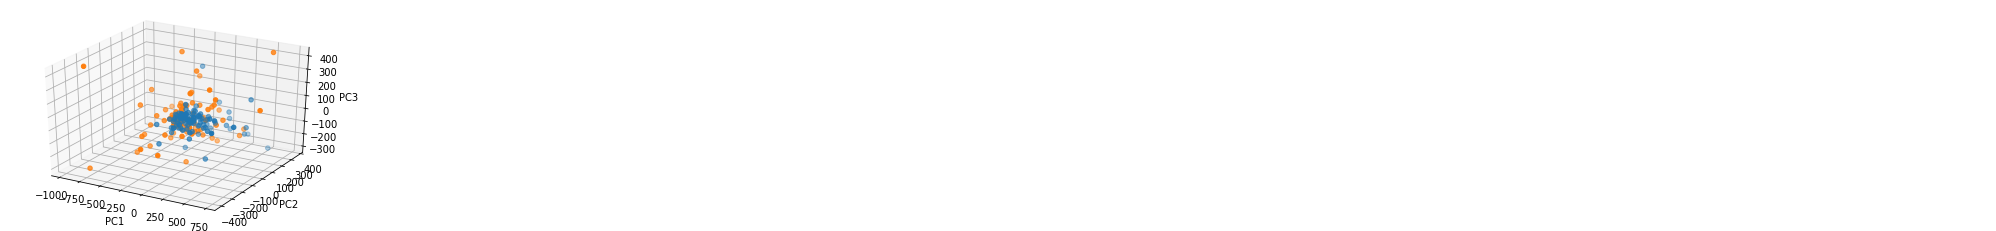

In [36]:
#3d scatter plot after PCA
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(pos_class[pos_class.columns[2]], pos_class[pos_class.columns[3]], pos_class[pos_class.columns[4]], 'blue')
ax.scatter3D(neg_class[neg_class.columns[2]], neg_class[neg_class.columns[3]], neg_class[neg_class.columns[4]], 'orange')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

Text(0.09379629152477457, 0.012566320283548647, 'PC3')